In [ ]:
WEEK 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Display first few rows
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


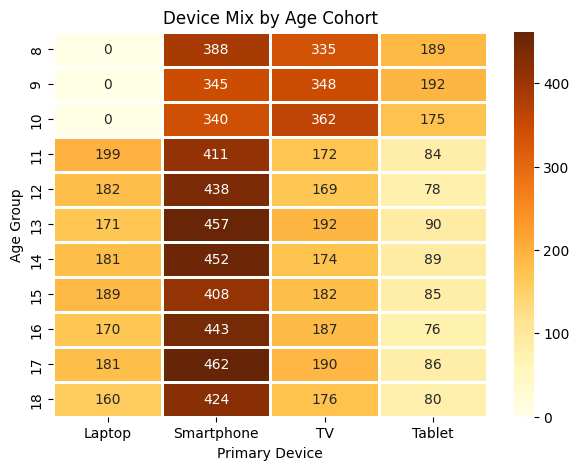

In [3]:
#  Heatmap - Age_group × Primary_Device
ct = pd.crosstab(df["Age"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlOrBr",     
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()

In [ ]:
Insights: TVs are the second most common, while laptops and tablets show lower usage.
This highlights that smartphones are central to daily digital activity

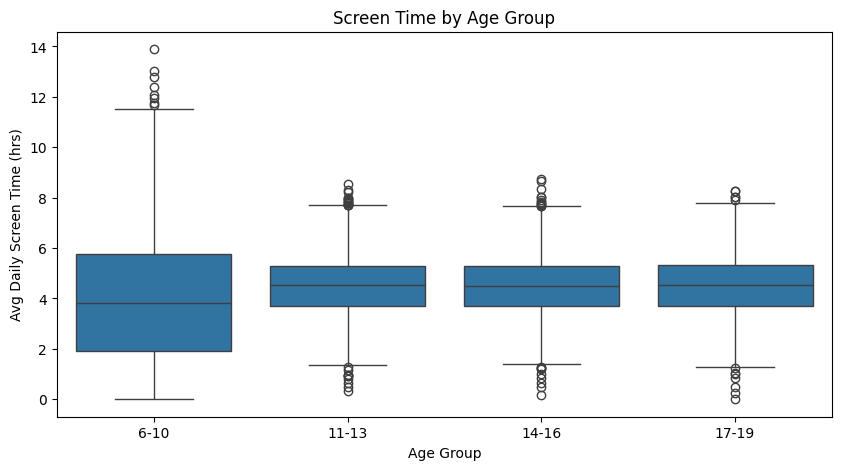

In [4]:
# 2. Boxplot: Screen time by Age groups
df["Age_Group"] = pd.cut(df["Age"], bins=[5,10,13,16,19], labels=["6-10","11-13","14-16","17-19"])
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Age_Group", y="Avg_Daily_Screen_Time_hr")
plt.title("Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()

In [ ]:
Insights:11–13 and 14–16 year olds show the highest variation and median screen time.

Older teens (17–19) spend slightly less time on average, possibly due to academic/work responsibilities.

Kids aged 6–10 years still report significant screen usage, which may be concerning at such a young age.

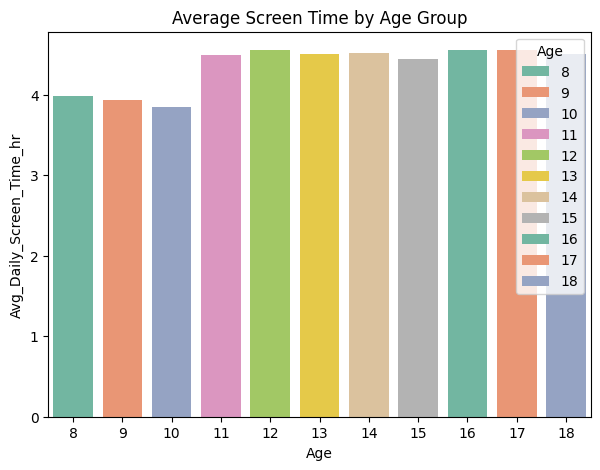

In [11]:
# countplot-Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue ="Age",
    errorbar=None
)

plt.title("Average Screen Time by Age Group")
plt.show()

In [ ]:
Insights:teenagers and Late Teens spend the most screen time (over 4 hours/day).
Pre-Teens have slightly lower screen time.
This suggests that screen engagement increases with age.

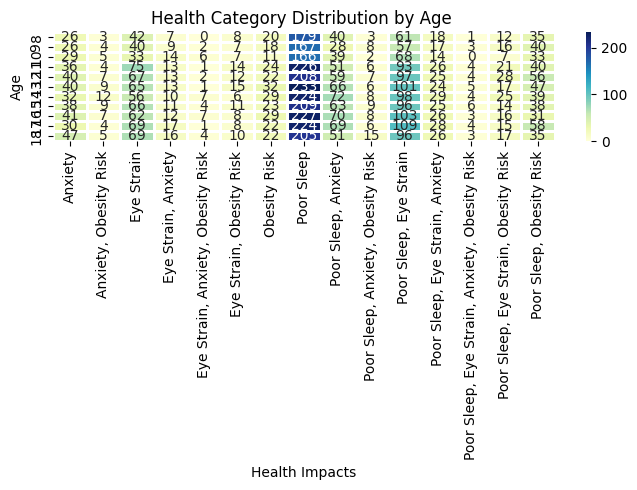

In [13]:
# Heatmap - Age_group × Health_Status
ct = pd.crosstab(df["Age"], df["Health_Impacts"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Health Category Distribution by Age ")
plt.xlabel("Health Impacts")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

In [ ]:
Insights:Pre-Teens have the highest counts across all health categories, especially in the ‘No Health Impacts’ group.
Teenagers show higher numbers in ‘Mental’ health issues, suggesting growing stress or screen-related effects.
Late Teens have the lowest overall counts, likely due to a smaller sample siz

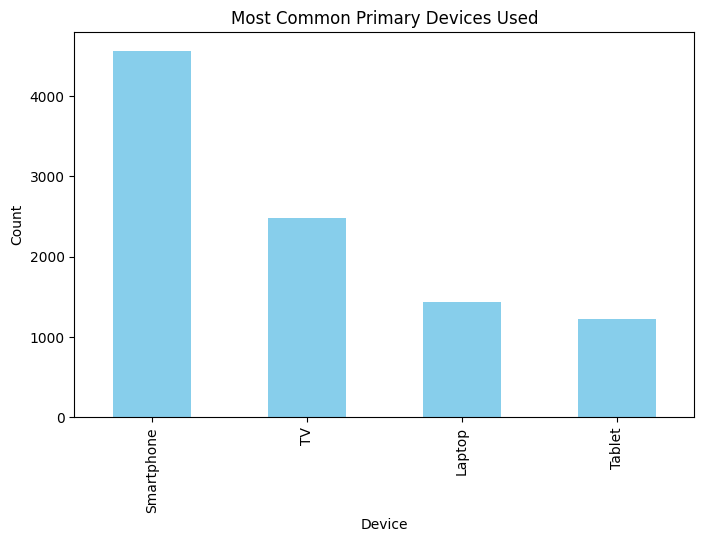

In [15]:
# 3. Bar chart: Primary Device usage count
plt.figure(figsize=(8,5))
df["Primary_Device"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Most Common Primary Devices Used")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

In [ ]:
Insights:Smartphones dominate as the most common device.

Laptops and TVs are secondary, while tablets are less frequent.

This highlights the mobile-first behavior among Indian kids.

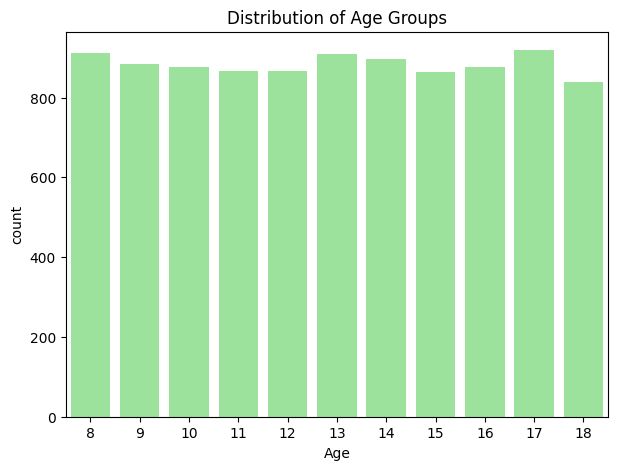

In [16]:
# Countplot - Age_group distribution
plt.figure(figsize=(7,5))
sns.countplot(x="Age", data=df, color="lightgreen")  
plt.title("Distribution of Age Groups")
plt.show()

In [ ]:
Insights:Most participants belong to the Pre-Teens group, followed by Teenagers.
Late Teens form the smallest portion

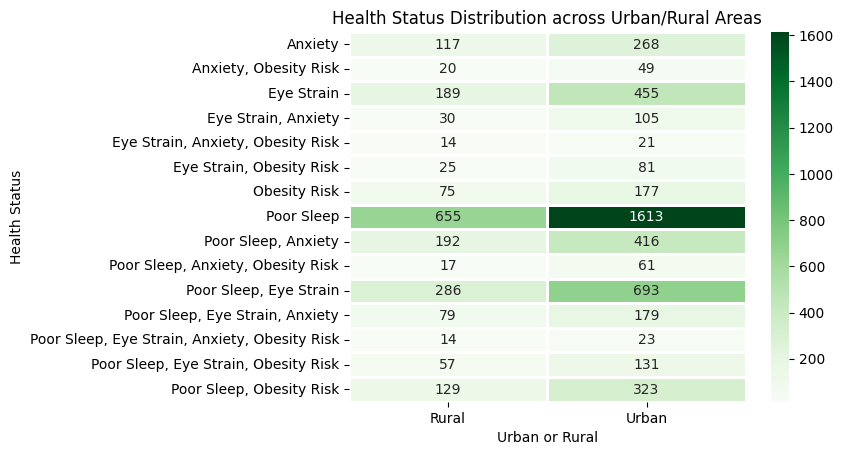

In [17]:
# Heatmap-Health Status Distribution 
ct = pd.crosstab(df["Health_Impacts"], df["Urban_or_Rural"])
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=1, linecolor="white")
plt.title("Health Status Distribution across Urban/Rural Areas")
plt.xlabel("Urban or Rural")
plt.ylabel("Health Status")
plt.show()

In [ ]:
Insights:Urban users show higher counts in all health categories compared to rural users.
Mental and combined (Mental, Physical) health issues are more prevalent in urban areas.

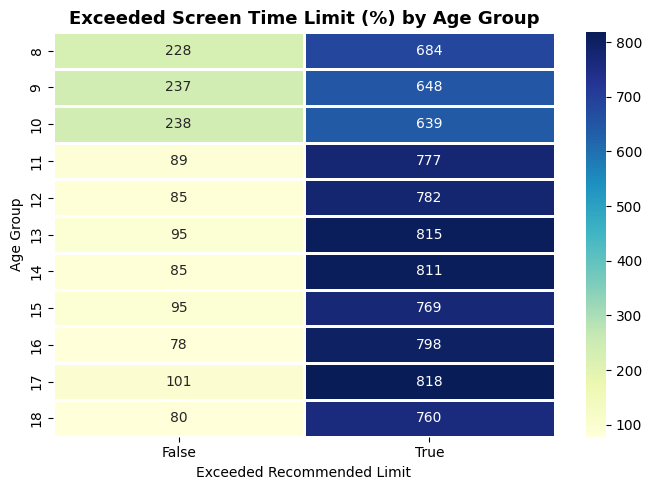

In [19]:
# Heatmap - Exceeded Limit % by Age Group
ct = pd.crosstab(df["Age"], df[ "Exceeded_Recommended_Limit"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Exceeded Screen Time Limit (%) by Age Group", fontsize=13, weight='bold')
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

In [ ]:
Around 80–90% of users exceed the recommended daily screen time limit.
Teenagers are the most likely to exceed iInsights:

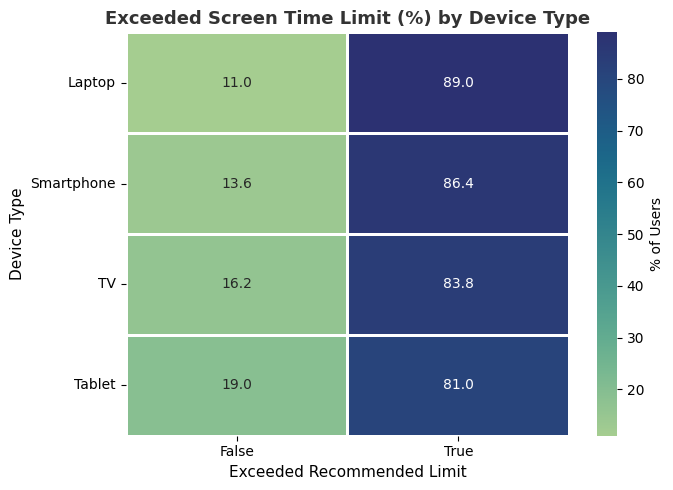

In [21]:
# Heatmap - % of Exceeded Screen Time Limit by Device Type

ct = pd.crosstab(
    df["Primary_Device"],
    df["Exceeded_Recommended_Limit"],
    normalize='index'
) * 100

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap="crest",        
    linewidths=1,
    linecolor="white",
    cbar_kws={'label': '% of Users'}
)

plt.title("Exceeded Screen Time Limit (%) by Device Type", fontsize=13, weight='bold', color="#333333")
plt.xlabel("Exceeded Recommended Limit", fontsize=11)
plt.ylabel("Device Type", fontsize=11)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
Insights:Portable devices (e.g., smartphones, tablets, laptops) show the highest screen-time exceedance — about 86.4% of users go beyond the recommended limit.
Fixed devices (e.g. TVs) have a slightly lower exceedance rate (~84%), but it’s still very high.

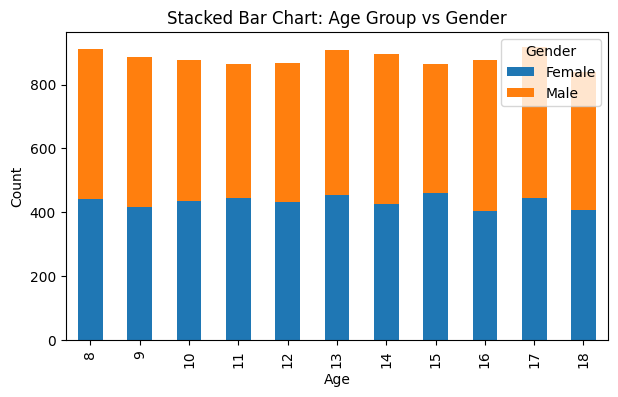

In [22]:
# STACKED BAR CHART  – Age group vs Gender
age_gender = pd.crosstab(df['Age'], df['Gender'])
age_gender.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Stacked Bar Chart: Age Group vs Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


In [ ]:
Insights:Pre-teens represent the largest user group, followed by teenagers and late teens.
Both males and females are well represented, showing that screen engagement is high across genders.

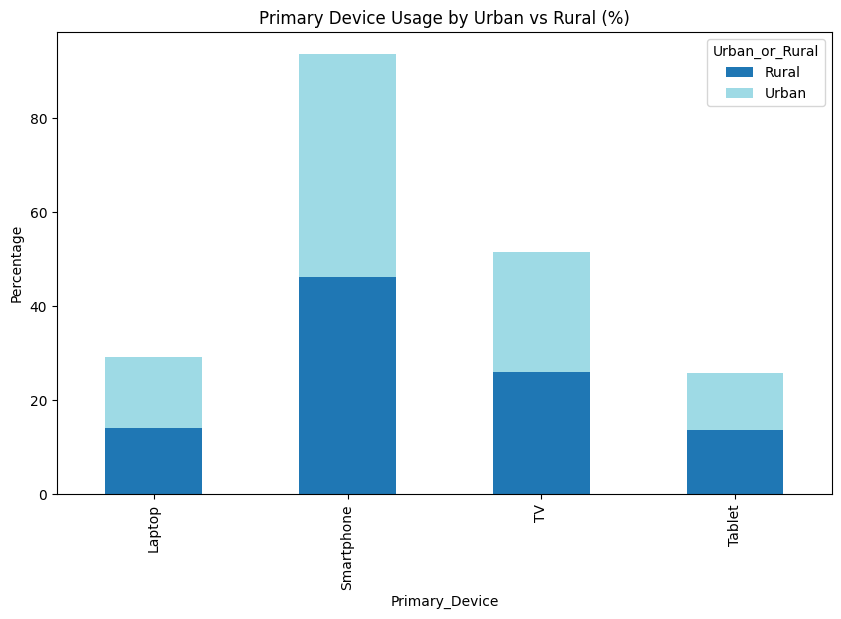

In [24]:
# 3. Stacked Bar: Primary Device usage by Urban/Rural
device_loc = pd.crosstab(df["Primary_Device"], df["Urban_or_Rural"], normalize="columns") * 100
device_loc.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Primary Device Usage by Urban vs Rural (%)")
plt.ylabel("Percentage")
plt.show()

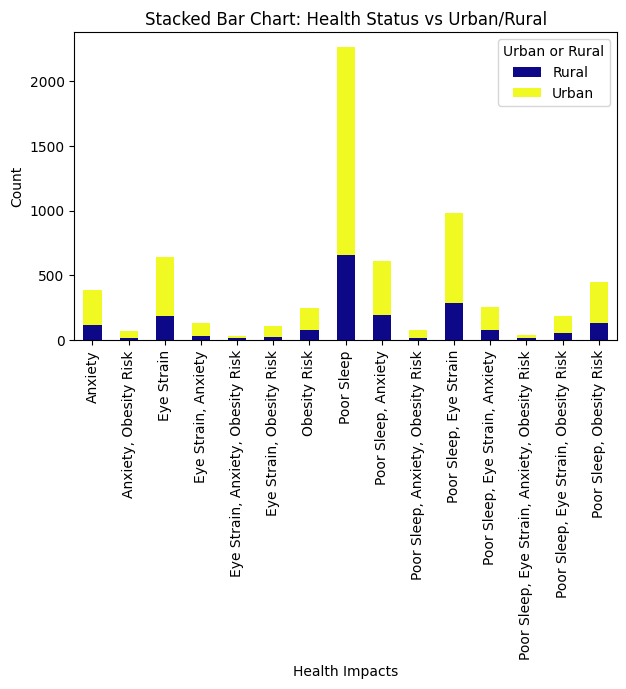

In [26]:
# STACKED BAR CHART – Health Status vs Urban_or_Rural
health_urban = pd.crosstab(df['Health_Impacts'], df['Urban_or_Rural'])
health_urban.plot(kind='bar', stacked=True, figsize=(7,4), colormap='plasma')
plt.title("Stacked Bar Chart: Health Status vs Urban/Rural")
plt.xlabel("Health Impacts")
plt.ylabel("Count")
plt.legend(title="Urban or Rural")
plt.show()

In [ ]:
Insights:The Mental and No Health Impacts categories have the highest overall counts.
Both categories show a larger share of Urban users compared to Rural ones.
The Mental, Physical group follows next, with Urban dominance as well.